## Normal Distribution

In [4]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random

##### Normal distribution

The law of large numbers is a statistical principle that states that as the sample size of an experiment increases, the average of the results will approach the expected value. This means that as the sample size increases, the sample mean becomes a more accurate estimate of the true population mean. However, the law of large numbers does not provide information about how close the estimate is to the true population parameter, regardless of the number of times the experiment is run.

To address this issue, the central limit theorem can be used. This statistical principle states that the distribution of the sample mean will approximate a normal distribution as the sample size increases, even if the underlying population is not normally distributed. In other words, the central limit theorem states that the sample mean will be approximately normally distributed, provided that the sample size is sufficiently large. A lot of measures in the real world are normaly distributed; heights, weights, IQ scores etc. are a few examples.

The concepts of normal curve, which is bell shaped, is the key concept of the central limit theorem. The normal curve is symmetrical around the expected value of the underlying probability distribution. The normal distribution is symmetrical, with the mean, median, and mode all equal to the same value. Most of the observations are concentrated at the centre and the measure of the central tendency, like the 'mean', determines the location of the peak of the curve. The standard deviation determines the spread of the distribution, with a larger standard deviation resulting in a wider distribution and a smaller standard deviation resulting in a narrower distribution (Tijms , 2012).

The bell shaped normal distribution can be described by the function

$$ f(x) = \frac{1}{\sqrt{2 \pi \sigma^2 }} e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$

The function is defined by two parameters viz. $\mu$ and $\sigma$, where $\mu$ determine the location of the parameter and $\sigma$ determine the shape.

##### Probability Density Function (PDF)

The concept of probability density function (PDF) is important in describing the normal cruve. A probability density function (PDF) is a function that describes the probability of a continuous random variable taking on a particular value. This is a nonnegative for all values of the random variable, meaning the function must have a value of 0 or greater at all points. Further more, the total area under the curve of the function must be equal to 1.

An important property of the normal distribution is the emperical rule. The empirical rule states that for a normal distribution, approximately 68% of the data falls within one standard deviation of the mean, 95% falls within two standard deviations of the mean, and 99.7% falls within three standard deviations of the mean. This is an important concept in statistics as if we know the distribution is normal, then we can use the empirical rule to predict where most of the data will fall within the distribution.

##### Cumulative Density Function (CDF)

It is possible to understand the probability of different values in a normal distribution using the cumulative distribution function (CDF). This is achieved by transforming the distribution to the "standard normal" distribution and look up the corresponding value in the standard normal CDF. The CDF gives the probability that a random variable will take on a value less than or equal to the value you specify.

##### Standard Normal Distribution

The standard normal distribution is a special type of normal distribution in which the mean is 0 and the standard deviation is 1. This means that the distribution is centered around 0, and most of the data points are within one standard deviation of the mean. Standard normal distributions are often used in statistical analysis because they are a useful way to model and analyze real-world data. 

In [17]:
#To generate a sample of standard normal distribution
df = np.random.normal(loc=0.0, scale=1.0, size=1000)

In [18]:
#find mean of sample
np.mean(df)

0.06276040925465527

In [19]:
#find standard deviation of sample
np.std(df, ddof=1)

1.0062696873494326

The mean is close to 0 and standard deviation is close to 1.

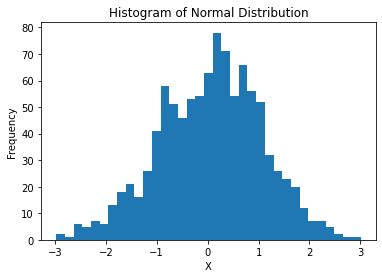

In [24]:
# Generate a histogram of the sample data
plt.hist(df, bins=35)

# Add a title and labels to the axes
plt.title('Histogram of Normal Distribution')
plt.xlabel('X')
plt.ylabel('Frequency')

# Show the plot
plt.show()

#### An example with real world data

In the following section, the Heights and Weights Dataset will be used to check the distribution of the height data. This simulated dataset contains 25,000 synthetic records of human heights and weights of 18 years old children. http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html

In [7]:
#Read data file
df = pd.read_csv('SOCR-HeightWeight.csv')
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [15]:
#Read height data
height = df['Height(Inches)']

# Calculate the minimum, mean, maximum, and standard deviation of the height
min_value = height.min()
mean_value = height.mean()
max_value = height.max()
std_value = height.std()

# Print the results
print("Minimum value:", min_value)
print("Mean value:", mean_value)
print("Maximum value:", max_value)
print("Standard deviation:", std_value)

Minimum value: 60.27836
Mean value: 67.99311359679979
Maximum value: 75.1528
Standard deviation: 1.901678771205604


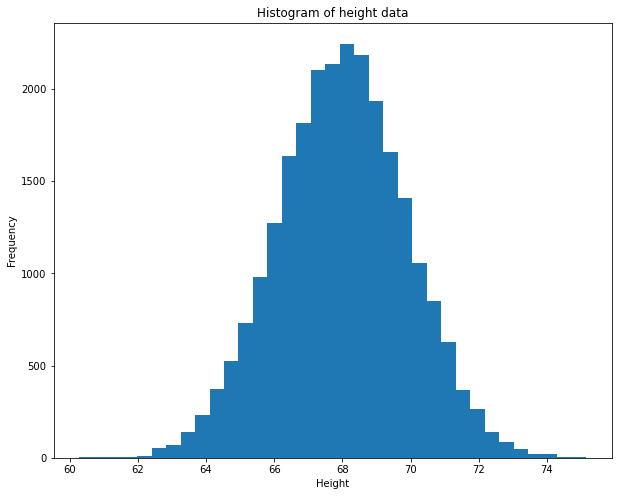

In [28]:
#Set the figure size
plt.figure(figsize=(10, 8))

#Read height data
height = df['Height(Inches)']

# Plot the histogram
plt.hist(height, bins=35)

# Add a title and axis labels
plt.title('Histogram of height data')
plt.xlabel('Height')
plt.ylabel('Frequency')

# Show the plot
plt.show()

It is obvious from the histogram above that most of the values are centred around 68 inch, which is the mean.

##### Fitting a normal curve to the histogram

Now a normal curve can be fitted to the above histogram.

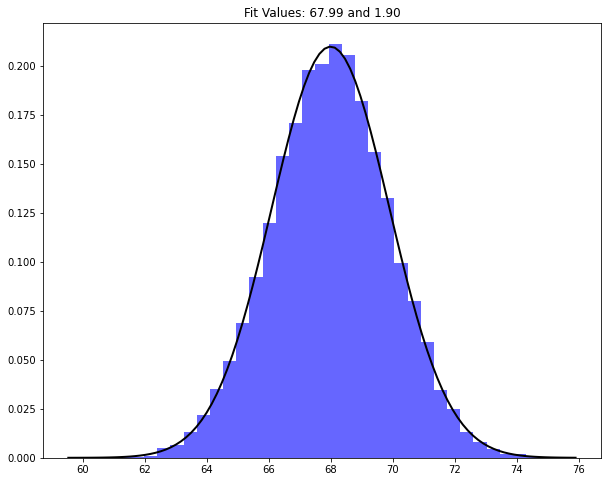

In [29]:
#Set the figure size
plt.figure(figsize=(10, 8))

#Code source: https://www.geeksforgeeks.org/how-to-plot-normal-distribution-over-histogram-in-python/
mu, std = norm.fit(height)

# Plot the histogram.
plt.hist(height, bins=35, density=True, alpha=0.6, color='b')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
  
plt.show()

##### Apply the emperical rule predict where the data is likely to fall within the distribution.

In [41]:
# Apply the empirical rule to predict where the data is likely to fall within the distribution
lower_bound_1std = mu - std
upper_bound_1std = mu + std
lower_bound_2std = mu - 2*std
upper_bound_2std = mu + 2*std
lower_bound_3std = mu - 3*std
upper_bound_3std = mu + 3*std

# Print the results
print(f"68% of observation falls between {lower_bound_1std:.2f} and {upper_bound_1std:.2f}")
print(f"95% of observation falls between {lower_bound_2std:.2f} and {upper_bound_2std:.2f}")
print(f"99.7% of observation falls between {lower_bound_3std:.2f} and {upper_bound_3std:.2f}")

68% of observation falls between 66.09 and 69.89
95% of observation falls between 64.19 and 71.80
99.7% of observation falls between 62.29 and 73.70


#### Calculating the percentile

It is possible calculate the percentile of a value which is a measure of the relative standing of a value in a distribution. Percentile represents the percentage of values in the distribution that are equal to or less than the value of our choice. For example, if a value is at the 50th percentile of a distribution, this means that 50% of the values in the distribution are equal to or less than that value. Similarly, if a value is at the 99th percentile of a distribution, this means that only 1% of the values in the distribution are above that value.

In [47]:
# Calculate the percentile of a value in the distribution
value = 70
percentile = norm.cdf(value, mu, std)

# Print the result
print(f"The percentile is {percentile:.2f}")

The percentile is 0.85


#### Conclusion

The normal distribution is a type of probability distribution represented by a bell-shaped curve. It is a common tool used to model and analyze data. The normal distribution is characterized by its mean and standard deviation and is useful due to its symmetry, continuity, and non-negativity. It is utilized in a variety of fields, such as statistics, finance, engineering etc. The proparties of the normal curve often used to analyse data that is similar to a normal distribution. In summary, the normal distribution is a crucial and frequently utilized concept in statistics and data analysis.

### References

1. Tijms H (2012), Understanding Probability. Cambridge University Press.